Import Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

Read The Data

In [ ]:
df= pd.read_csv('Leads.csv')

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
df.shape

(9240, 37)

In [ ]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


DATA Cleaning

Here we drop Prospect ID and Lead Number due to unique id number

In [ ]:
df.drop(['Prospect ID','Lead Number'],axis=1,inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [ ]:
# Coverting Select value to Nan
df= df.replace('Select',np.nan)

In [ ]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [ ]:
# drop the unique value columns
df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [ ]:
# checking null values
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [ ]:
#% of null values
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [ ]:
# drop the column wth more than 30% missing value

In [ ]:
df= df.loc[:,df.isnull().sum()/len(df)*100<=30]

In [ ]:
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [ ]:
df.shape

(9240, 20)

In [ ]:
df['Country']=df['Country'].fillna('not provided')
df['What is your current occupation']=df['What is your current occupation'].fillna('not provided')
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna('not provided')

In [ ]:
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

Categorical Attribute Analysis

In [ ]:
df['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [ ]:
def slots(x):
  category=""
  if x=="India":
    category= "India"
  elif x=="not provided":
     category="not provided"
  else:
     category="outside India"
  return category


In [ ]:
df['Country']=df.apply(lambda x:slots(x['Country']),axis=1)
df['Country'].value_counts()

India            6492
not provided     2461
outside India     287
Name: Country, dtype: int64

In [ ]:
# here India have most missing value so we can input all not provided to India 
df['Country']=df['Country'].replace('not provided','India')
df['Country'].value_counts()

India            8953
outside India     287
Name: Country, dtype: int64

In [ ]:
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [ ]:
# checking the percentage of loss if the null values are removed
round(100*(sum(df.isnull().sum(axis=1)>1)/df.shape[0]),2)

1.48

In [ ]:
df= df[df.isnull().sum(axis=1)<1]

In [ ]:
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

EDA

In [ ]:
df.shape

(9074, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

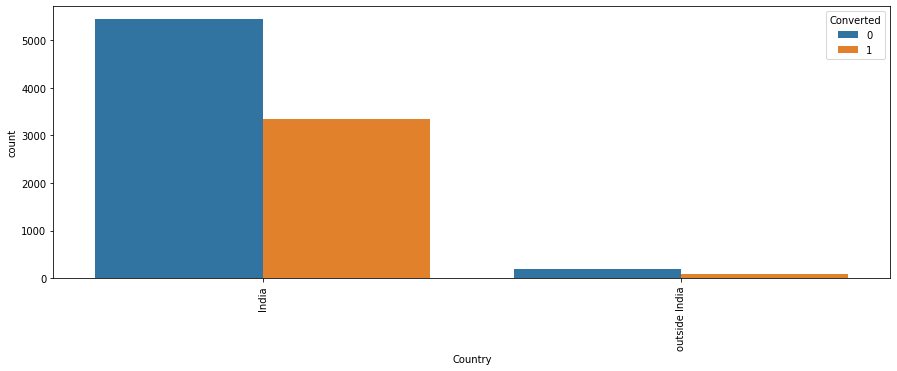

In [ ]:
plt.figure(figsize=(15,5))
s1= sns.countplot(df.Country,hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

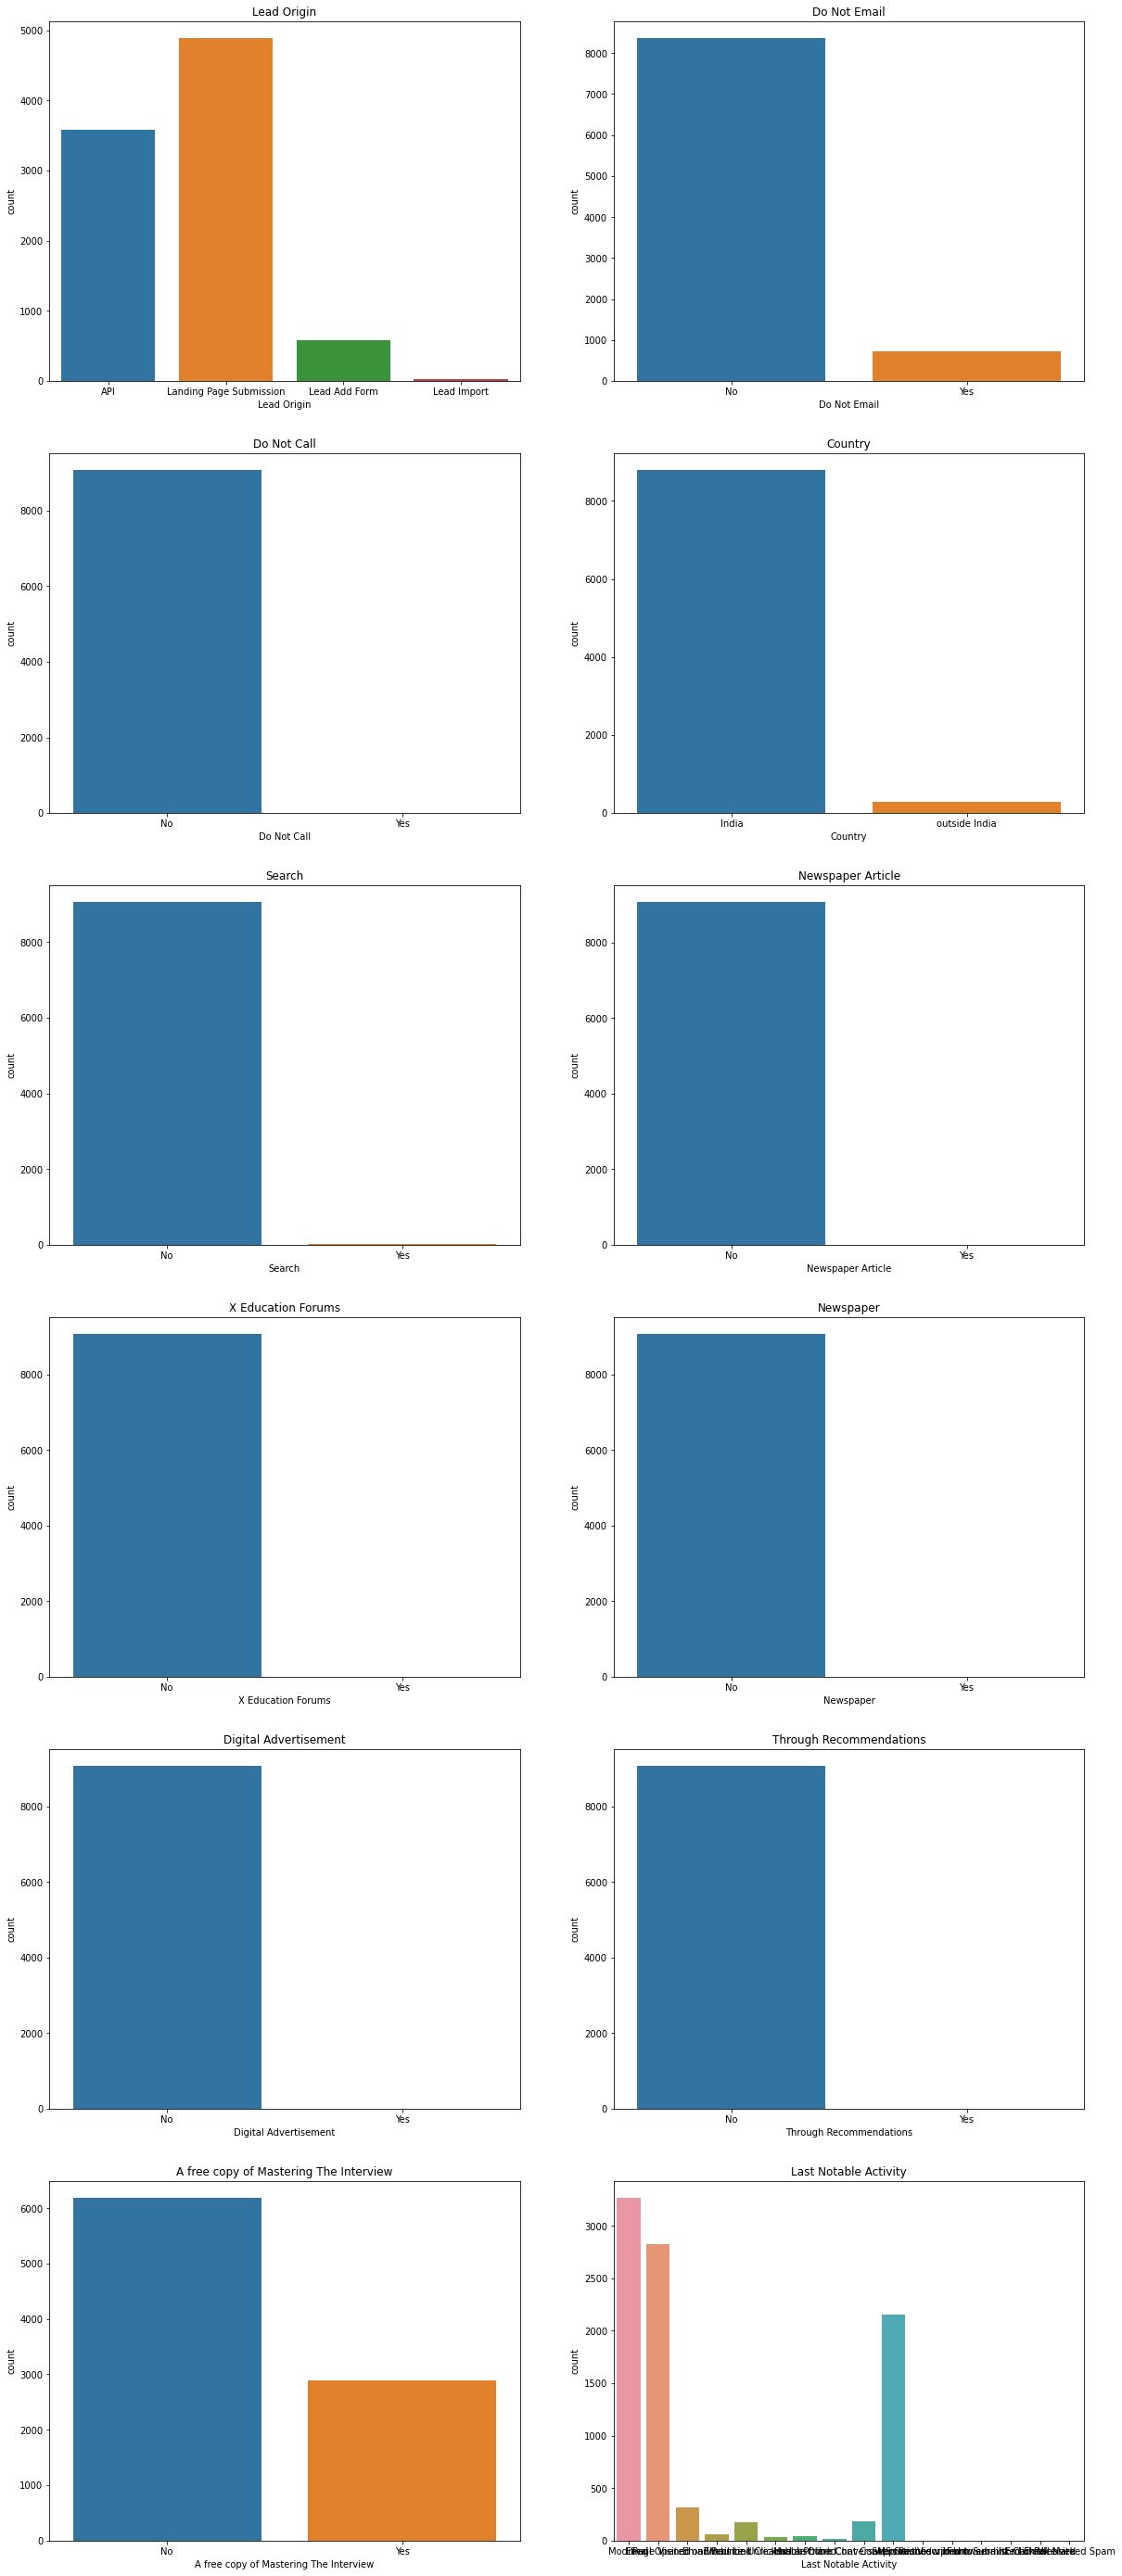

In [ ]:
plt.figure(figsize=(20,50))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df['Last Notable Activity'])
plt.title('Last Notable Activity')

plt.show()

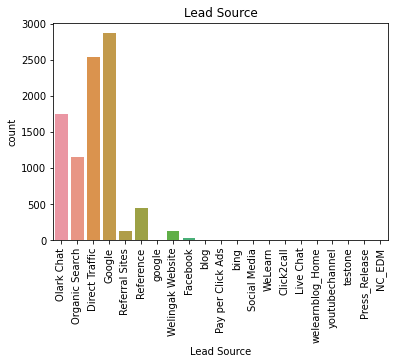

In [ ]:
sns.countplot(df['Lead Source']).tick_params(axis='x',rotation=90)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'Last Activity')

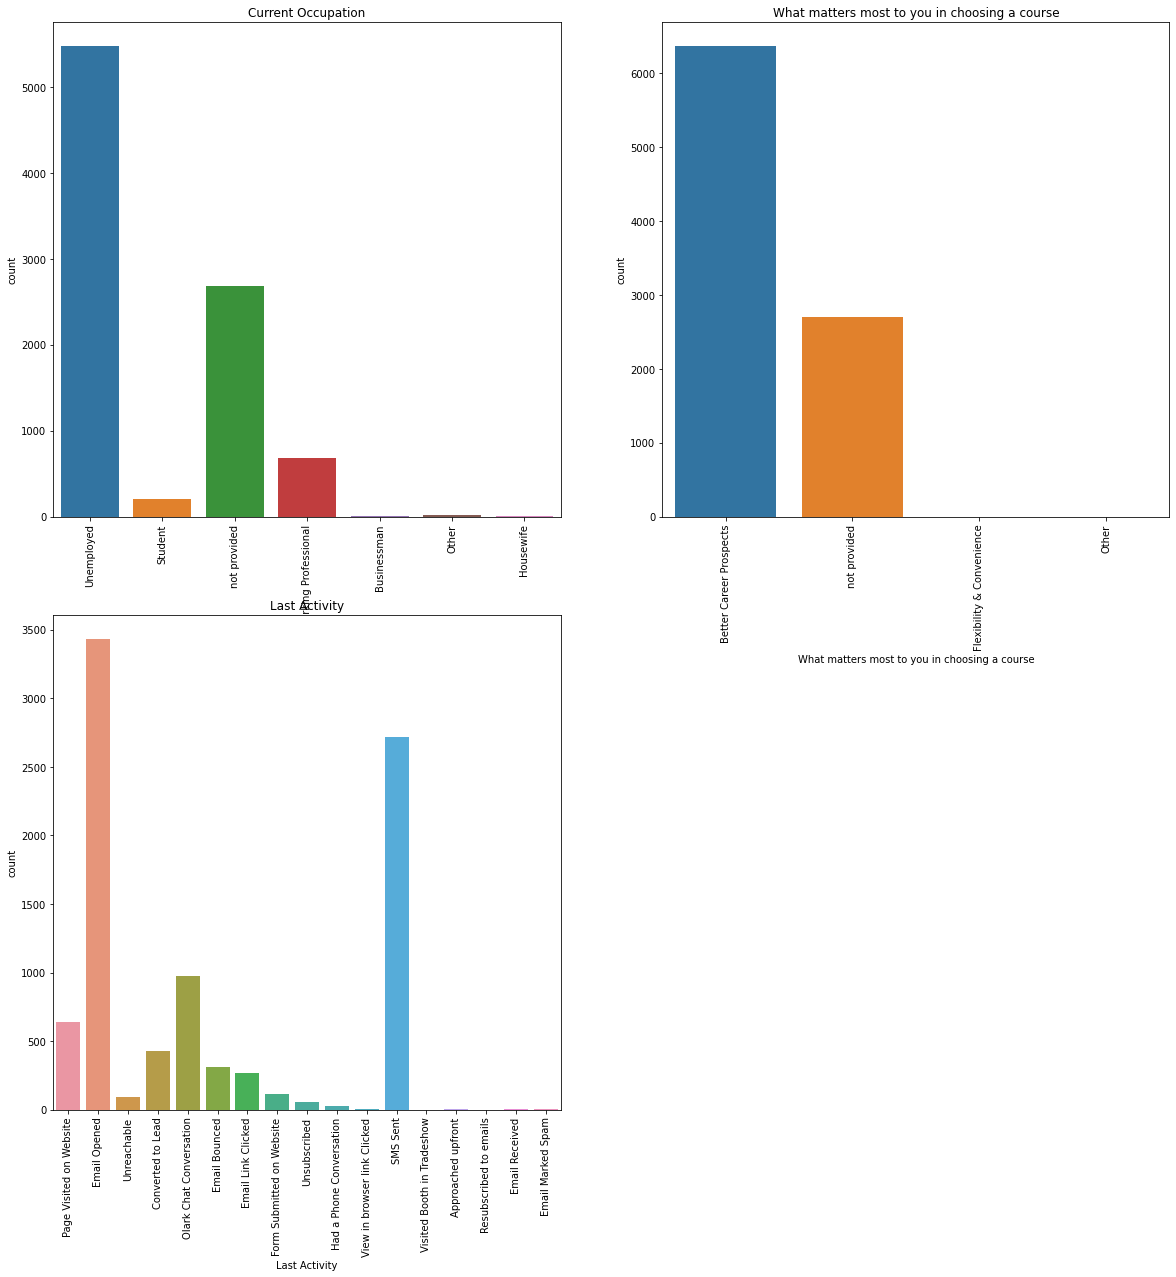

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(df['What is your current occupation']).tick_params(axis='x',rotation=90)
plt.title('Current Occupation')

plt.subplot(2,2,2)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x',rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,3)
sns.countplot(df['Last Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

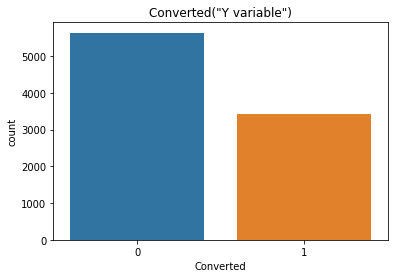

In [ ]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

Continuous Variables

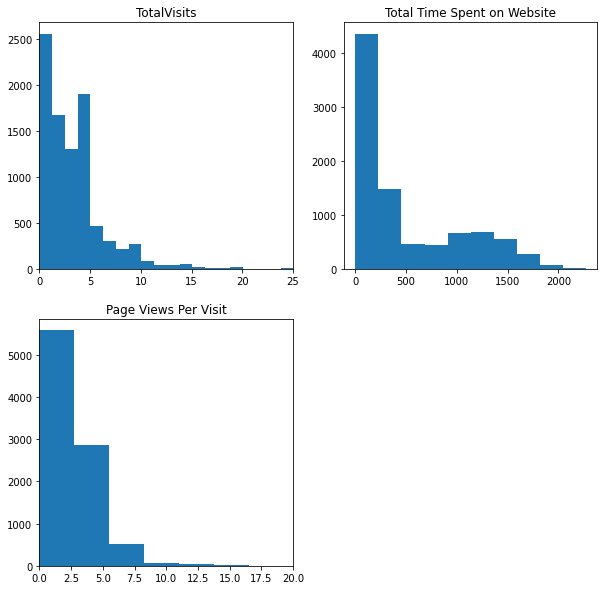

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.hist(df['TotalVisits'],bins= 200)
plt.title('TotalVisits')
plt.xlim(0,25)


plt.subplot(222)
plt.hist(df['Total Time Spent on Website'],bins= 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'],bins= 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

# Relate the all categorical var to converted

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

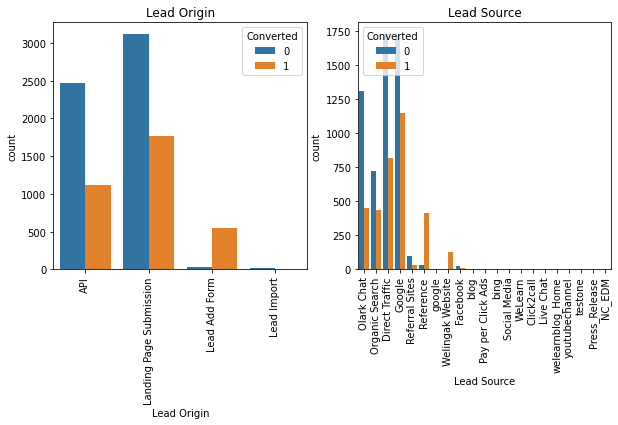

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Lead Source')

plt.show()

Text(0.5, 1.0, 'Do Not Call')

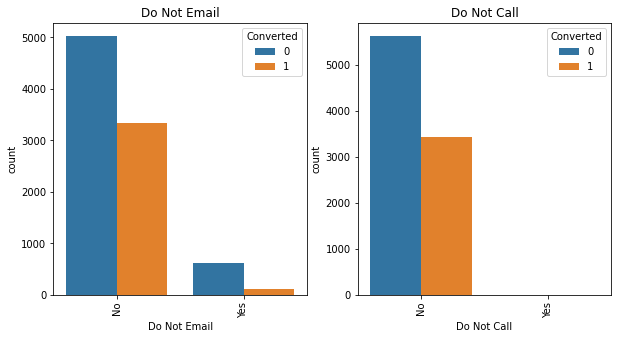

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')

Text(0.5, 1.0, 'Country')

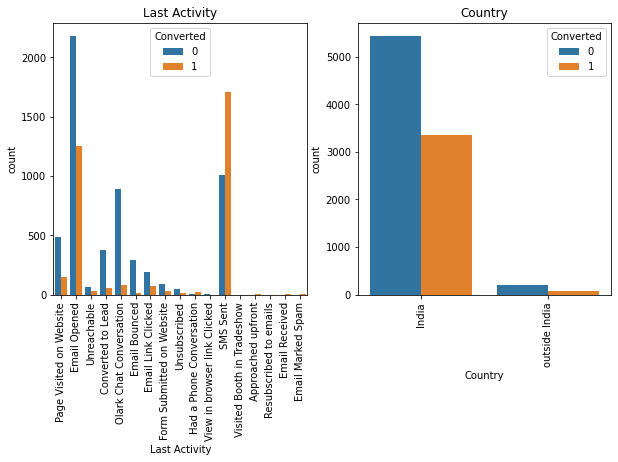

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Last Activity',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Country')

Text(0.5, 1.0, 'What matters most to you in choosing a course')

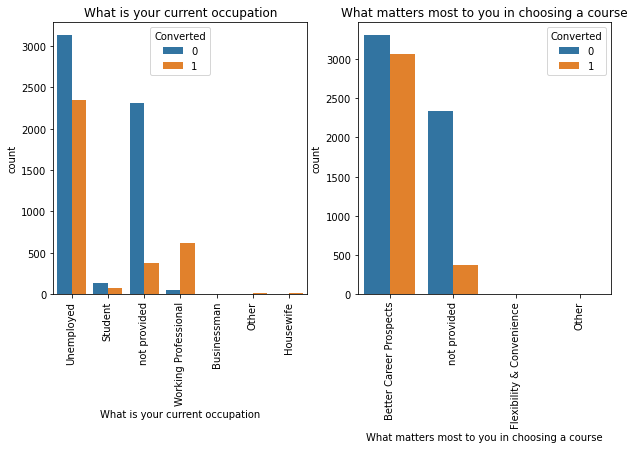

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('What is your current occupation')

plt.subplot(1,2,2)
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('What matters most to you in choosing a course')

Text(0.5, 1.0, 'Newspaper Article')

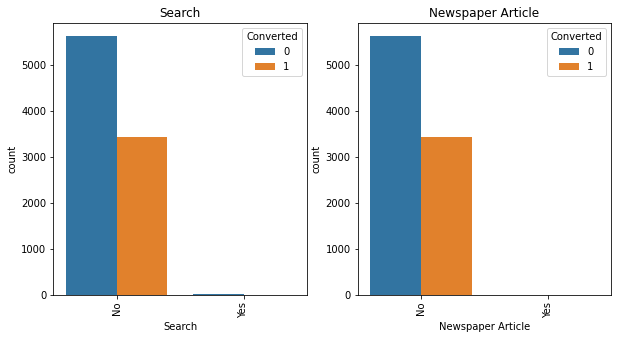

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Search',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Search')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper Article',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Newspaper Article')

Text(0.5, 1.0, 'Newspaper')

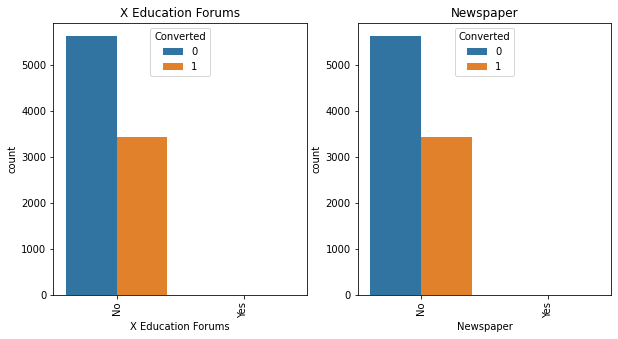

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='X Education Forums',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('X Education Forums')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Newspaper')

Text(0.5, 1.0, 'Through Recommendations')

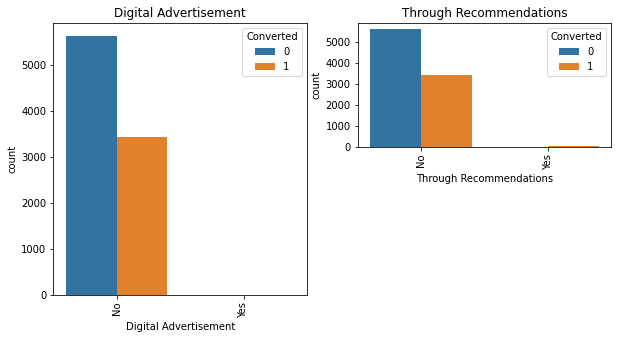

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Digital Advertisement',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Digital Advertisement')

plt.subplot(2,2,2)
sns.countplot(x='Through Recommendations',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Through Recommendations')

Text(0.5, 1.0, 'Last Notable Activity')

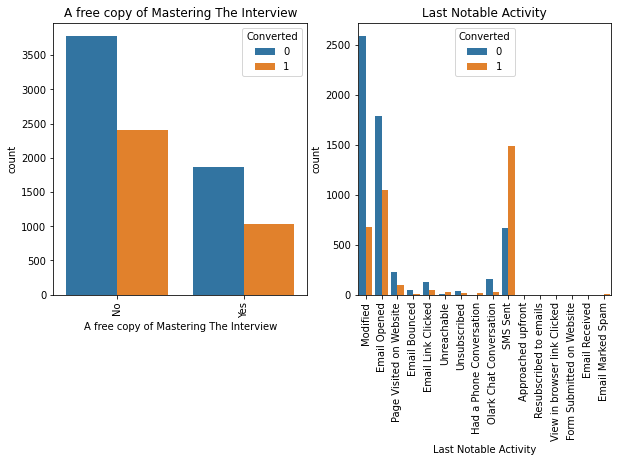

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity',hue='Converted',data=df).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')

Handle Outliers


In [ ]:
numeric= df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


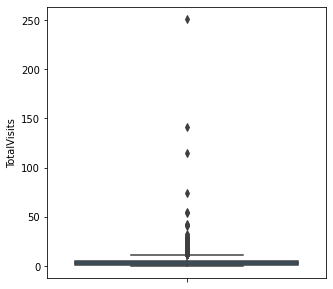

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df['TotalVisits'])
plt.show()

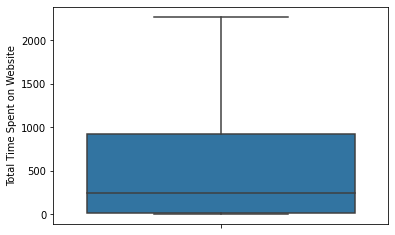

In [ ]:
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

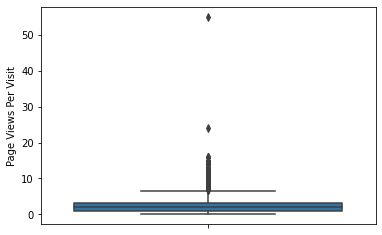

In [ ]:
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

here we can see presence of outliers of TotalVisits

Outlier treatment 

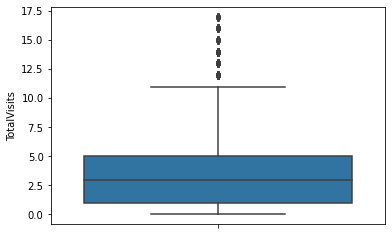

In [ ]:
Q3= df.TotalVisits.quantile(0.99)
df=df[(df.TotalVisits<= Q3)]
Q1=df.TotalVisits.quantile(0.01)
df=df[(df.TotalVisits>= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

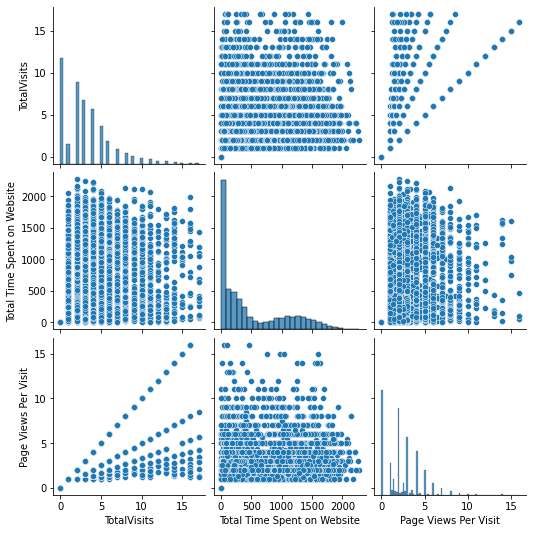

In [ ]:
sns.pairplot(data=df,vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

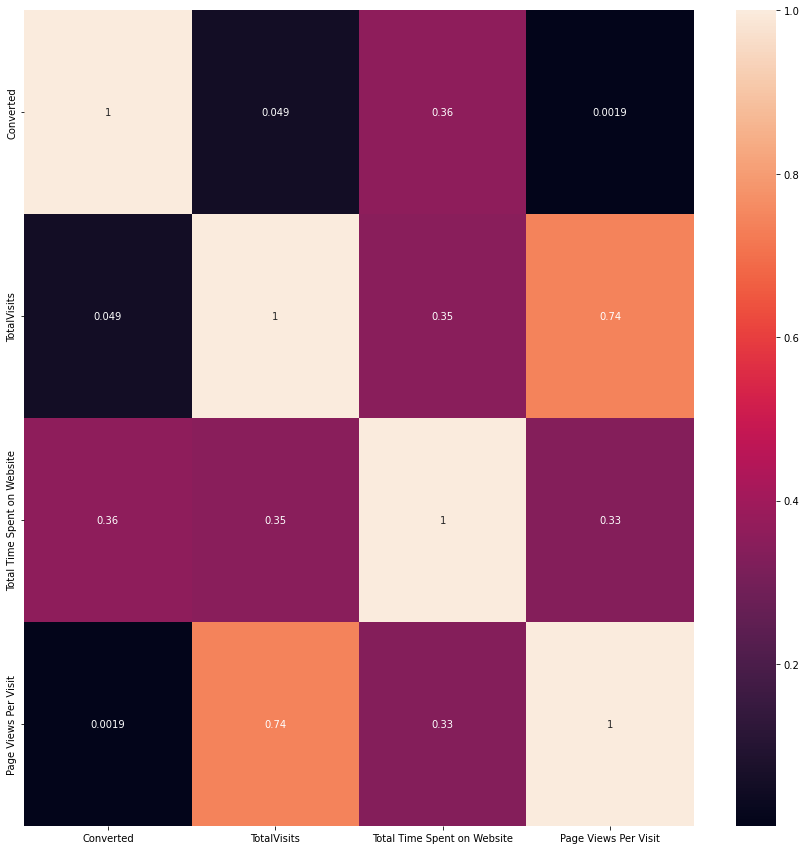

In [ ]:
# check the corr coefficient
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Country                                        8991 

Dummy Variable

In [ ]:
cols_drop=['Country']


In [ ]:
df=df.drop(cols_drop,1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   What is your current occupation                8991 

In [ ]:
# the list of categorical value
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# create the Dummy variables using get_dummies
dummy= pd.get_dummies(df[['Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']],drop_first=True)
df_dum= pd.concat([df,dummy],axis=1)
df_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Unemployed,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Unemployed,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Unemployed,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,not provided,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   What is your current occupation                8991 

In [ ]:
df_dum=df_dum.drop(['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','What is your current occupation','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity'],1)
df_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df_dum.drop(['Converted'],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y=df_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=10)

In [ ]:
#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe=RFE(lr,step=15)
rfe=rfe.fit(X_train,y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 3),
 ('Lead Source_blog', False, 3),
 ('Lead Source_google', False, 3),
 ('Lead Source_testone', False, 3),
 ('Lead Source_welearnblog_Home', False, 4),
 ('Lead Source_youtubechann

In [ ]:
col=X_train.columns[rfe.support_]

find p-values and VIFs

In [ ]:
X_train=X_train[col]

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm1= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2473.6
Date:                Sat, 25 Feb 2023   Deviance:                       4947.1
Time:                        13:14:08   Pearson chi2:                 6.34e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1358      1.014     -0.134      0.893      -2.124       1.852
TotalVisits                                              1.9281      0.312      6.174      0.000       1.316       2.540
Total Time Spent on Website                              4.7321      0.176     26.943      0.000       4.388       5.076
Page Views Per Visit                                    -2.1620      0.460     -4.702      0.000      -3.063      -1.261
Lead Origin_Lead Add Form                               23.7384   4.07e+04      0.001      1.000   -7.97e+04    7.98e+04
Lead Origin_Lead Import                                  1.2509      0.873      1.433      0.152      -0.460       2.962
Lead Source_Direct Traffic                              -0.2550      0.729     -0.350      0.727      -1.684       1.174
Lead Source_Google                                       0.2039      0.728      0.280      0.779      -1.224       1.631
Lead Source_Olark Chat                                   1.3827      0.735      1.880      0.060      -0.059       2.824
Lead Source_Organic Search                              -0.1398      0.734     -0.191      0.849      -1.577       1.298
Lead Source_Reference                                  -19.7796   4.07e+04     -0.000      1.000   -7.97e+04    7.97e+04
Lead Source_Referral Sites                               0.0448      0.795      0.056      0.955      -1.513       1.603
Lead Source_Social Media                                25.3285   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                           -17.3476   4.07e+04     -0.000      1.000   -7.97e+04    7.97e+04
Do Not Email_Yes                                        -1.3860      0.210     -6.600      0.000      -1.798      -0.974
Last Activity_Converted to Lead                         -0.9863      0.220     -4.485      0.000      -1.417      -0.555
Last Activity_Email Bounced                             -1.3385      0.397     -3.370      0.001      -2.117      -0.560
Last Activity_Form Submitted on Website                 -0.9977      0.376     -2.656      0.008      -1.734      -0.261
Last Activity_Olark Chat Conversation                   -1.6124      0.204     -7.902      0.000      -2.012      -1.212
Last Activity_Page Visited on Website                   -0.8249      0.234     -3.521      0.000      -1.284      -0.366
Last Activity_Unreachable                               -1.5885      0.647     -2.456      0.014      -2.856      -0.321
What is your current occupation_Housewife               22.4418   2.96e+04      0.001      0.999    -5.8e+04    5.81e+04
What is your current occupation_Student                 -0

In [ ]:
# import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,144.44
22,What is your current occupation_Unemployed,137.41
9,Lead Source_Reference,106.64
6,Lead Source_Google,71.05
24,What is your current occupation_not provided,65.46
5,Lead Source_Direct Traffic,63.59
7,Lead Source_Olark Chat,44.45
12,Lead Source_Welingak Website,34.25
8,Lead Source_Organic Search,28.58
23,What is your current occupation_Working Profes...,17.72


In [ ]:
X_train.drop(['Lead Origin_Lead Add Form','Lead Source_Direct Traffic','Lead Source_Google','Lead Source_Reference'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm2= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.5
Date:                Sat, 25 Feb 2023   Deviance:                       5357.1
Time:                        13:30:04   Pearson chi2:                 6.38e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7692      0.710      1.083      0.279      -0.622       2.161
TotalVisits                                              1.1282      0.300      3.763      0.000       0.541       1.716
Total Time Spent on Website                              4.0196      0.164     24.557      0.000       3.699       4.340
Page Views Per Visit                                    -4.3421      0.449     -9.679      0.000      -5.221      -3.463
Lead Origin_Lead Import                                  0.1735      0.485      0.358      0.721      -0.777       1.124
Lead Source_Olark Chat                                   0.4292      0.114      3.766      0.000       0.206       0.653
Lead Source_Organic Search                              -0.1099      0.111     -0.991      0.322      -0.327       0.107
Lead Source_Referral Sites                              -0.1019      0.323     -0.315      0.753      -0.735       0.532
Lead Source_Social Media                                24.9940   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             5.3410      1.013      5.271      0.000       3.355       7.327
Do Not Email_Yes                                        -1.3124      0.195     -6.736      0.000      -1.694      -0.931
Last Activity_Converted to Lead                         -1.5853      0.213     -7.436      0.000      -2.003      -1.167
Last Activity_Email Bounced                             -1.7894      0.385     -4.647      0.000      -2.544      -1.035
Last Activity_Form Submitted on Website                 -1.1376      0.354     -3.212      0.001      -1.832      -0.443
Last Activity_Olark Chat Conversation                   -1.7479      0.200     -8.749      0.000      -2.139      -1.356
Last Activity_Page Visited on Website                   -0.9186      0.224     -4.107      0.000      -1.357      -0.480
Last Activity_Unreachable                               -1.6973      0.634     -2.675      0.007      -2.941      -0.454
What is your current occupation_Housewife               23.7679   3.02e+04      0.001      0.999   -5.91e+04    5.92e+04
What is your current occupation_Student                 -0.4210      0.734     -0.574      0.566      -1.860       1.018
What is your current occupation_Unemployed              -0.4296      0.703     -0.611      0.541      -1.808       0.948
What is your current occupation_Working Professional     2.3079      0.725      3.184      0.001       0.887       3.729
What is your current occupation_not provided            -1.6353      0.706     -2.317      0.021      -3.019      -0.252
Last Notable Activity_Email Link Clicked                -1

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,Page Views Per Visit,6.13
18,What is your current occupation_Unemployed,5.97
0,TotalVisits,5.49
20,What is your current occupation_not provided,3.93
24,Last Notable Activity_Modified,3.92
14,Last Activity_Page Visited on Website,2.49
26,Last Notable Activity_Page Visited on Website,2.41
22,Last Notable Activity_Email Opened,2.37
4,Lead Source_Olark Chat,2.32
1,Total Time Spent on Website,2.26


In [ ]:
X_train.drop(['Lead Source_Organic Search','Lead Source_Social Media','What is your current occupation_Housewife'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm3= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.0
Date:                Sat, 25 Feb 2023   Deviance:                       5368.0
Time:                        13:35:17   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7204      0.578      2.975      0.003       0.587       2.854
TotalVisits                                              1.0601      0.297      3.564      0.000       0.477       1.643
Total Time Spent on Website                              4.0183      0.164     24.561      0.000       3.698       4.339
Page Views Per Visit                                    -4.3984      0.445     -9.890      0.000      -5.270      -3.527
Lead Origin_Lead Import                                  0.1610      0.485      0.332      0.740      -0.790       1.111
Lead Source_Olark Chat                                   0.4141      0.114      3.640      0.000       0.191       0.637
Lead Source_Referral Sites                              -0.0848      0.323     -0.263      0.793      -0.717       0.548
Lead Source_Welingak Website                             5.3290      1.013      5.259      0.000       3.343       7.315
Do Not Email_Yes                                        -1.3138      0.195     -6.747      0.000      -1.695      -0.932
Last Activity_Converted to Lead                         -1.6047      0.213     -7.541      0.000      -2.022      -1.188
Last Activity_Email Bounced                             -1.7964      0.385     -4.670      0.000      -2.550      -1.043
Last Activity_Form Submitted on Website                 -1.1323      0.354     -3.199      0.001      -1.826      -0.439
Last Activity_Olark Chat Conversation                   -1.7362      0.198     -8.753      0.000      -2.125      -1.347
Last Activity_Page Visited on Website                   -0.9325      0.223     -4.178      0.000      -1.370      -0.495
Last Activity_Unreachable                               -1.6954      0.634     -2.675      0.007      -2.938      -0.453
What is your current occupation_Student                 -1.3624      0.609     -2.236      0.025      -2.557      -0.168
What is your current occupation_Unemployed              -1.3716      0.572     -2.398      0.016      -2.493      -0.251
What is your current occupation_Working Professional     1.3618      0.598      2.279      0.023       0.190       2.533
What is your current occupation_not provided            -2.5771      0.576     -4.477      0.000      -3.705      -1.449
Last Notable Activity_Email Link Clicked                -1.9010      0.257     -7.408      0.000      -2.404      -1.398
Last Notable Activity_Email Opened                      -1.3515      0.087    -15.471      0.000      -1.523      -1.180
Last Notable Activity_Had a Phone Conversation          21.0755   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
Last Notable Activity_Modified                          -1

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,Page Views Per Visit,6.00
15,What is your current occupation_Unemployed,5.94
0,TotalVisits,5.42
21,Last Notable Activity_Modified,3.91
17,What is your current occupation_not provided,3.91
12,Last Activity_Page Visited on Website,2.49
23,Last Notable Activity_Page Visited on Website,2.40
19,Last Notable Activity_Email Opened,2.36
4,Lead Source_Olark Chat,2.32
1,Total Time Spent on Website,2.26


In [ ]:
X_train.drop(['Lead Origin_Lead Import','Lead Source_Referral Sites','Last Notable Activity_Had a Phone Conversation'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm4= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.2
Date:                Sat, 25 Feb 2023   Deviance:                       5372.4
Time:                        13:37:48   Pearson chi2:                 6.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7293      0.578      2.991      0.003       0.596       2.863
TotalVisits                                              1.0712      0.296      3.618      0.000       0.491       1.651
Total Time Spent on Website                              4.0120      0.163     24.588      0.000       3.692       4.332
Page Views Per Visit                                    -4.4185      0.443     -9.970      0.000      -5.287      -3.550
Lead Source_Olark Chat                                   0.4103      0.113      3.630      0.000       0.189       0.632
Lead Source_Welingak Website                             5.3245      1.013      5.255      0.000       3.339       7.310
Do Not Email_Yes                                        -1.3190      0.195     -6.773      0.000      -1.701      -0.937
Last Activity_Converted to Lead                         -1.6065      0.213     -7.556      0.000      -2.023      -1.190
Last Activity_Email Bounced                             -1.7949      0.385     -4.666      0.000      -2.549      -1.041
Last Activity_Form Submitted on Website                 -1.1325      0.354     -3.201      0.001      -1.826      -0.439
Last Activity_Olark Chat Conversation                   -1.7375      0.198     -8.762      0.000      -2.126      -1.349
Last Activity_Page Visited on Website                   -0.9331      0.223     -4.182      0.000      -1.370      -0.496
Last Activity_Unreachable                               -1.6983      0.634     -2.680      0.007      -2.940      -0.456
What is your current occupation_Student                 -1.3622      0.609     -2.235      0.025      -2.557      -0.168
What is your current occupation_Unemployed              -1.3700      0.572     -2.396      0.017      -2.491      -0.249
What is your current occupation_Working Professional     1.3614      0.598      2.278      0.023       0.190       2.533
What is your current occupation_not provided            -2.5786      0.576     -4.480      0.000      -3.707      -1.450
Last Notable Activity_Email Link Clicked                -1.9088      0.257     -7.440      0.000      -2.412      -1.406
Last Notable Activity_Email Opened                      -1.3581      0.087    -15.583      0.000      -1.529      -1.187
Last Notable Activity_Modified                          -1.2783      0.106    -12.012      0.000      -1.487      -1.070
Last Notable Activity_Olark Chat Conversation           -0.8353      0.372     -2.248      0.025      -1.564      -0.107
Last Notable Activity_Page Visited on Website           -1.1146      0.303     -3.681      0.000      -1.708      -0.521
Last Notable Activity_Unreachable                        1

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,Page Views Per Visit,5.97
13,What is your current occupation_Unemployed,5.87
0,TotalVisits,5.41
18,Last Notable Activity_Modified,3.89
15,What is your current occupation_not provided,3.89
10,Last Activity_Page Visited on Website,2.49
20,Last Notable Activity_Page Visited on Website,2.40
17,Last Notable Activity_Email Opened,2.35
3,Lead Source_Olark Chat,2.30
1,Total Time Spent on Website,2.25


In [ ]:
X_train.drop(['Last Notable Activity_Unreachable'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm5= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.3
Date:                Sat, 25 Feb 2023   Deviance:                       5376.5
Time:                        13:39:53   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7465      0.578      3.022      0.003       0.614       2.879
TotalVisits                                              1.0582      0.295      3.581      0.000       0.479       1.637
Total Time Spent on Website                              4.0098      0.163     24.596      0.000       3.690       4.329
Page Views Per Visit                                    -4.4170      0.443     -9.976      0.000      -5.285      -3.549
Lead Source_Olark Chat                                   0.4090      0.113      3.617      0.000       0.187       0.631
Lead Source_Welingak Website                             5.3269      1.013      5.257      0.000       3.341       7.313
Do Not Email_Yes                                        -1.3321      0.195     -6.847      0.000      -1.713      -0.951
Last Activity_Converted to Lead                         -1.5903      0.213     -7.483      0.000      -2.007      -1.174
Last Activity_Email Bounced                             -1.7798      0.385     -4.625      0.000      -2.534      -1.026
Last Activity_Form Submitted on Website                 -1.1148      0.354     -3.152      0.002      -1.808      -0.422
Last Activity_Olark Chat Conversation                   -1.7214      0.198     -8.685      0.000      -2.110      -1.333
Last Activity_Page Visited on Website                   -0.9141      0.223     -4.100      0.000      -1.351      -0.477
Last Activity_Unreachable                               -0.9396      0.395     -2.378      0.017      -1.714      -0.165
What is your current occupation_Student                 -1.3651      0.609     -2.241      0.025      -2.559      -0.171
What is your current occupation_Unemployed              -1.3746      0.572     -2.405      0.016      -2.495      -0.254
What is your current occupation_Working Professional     1.3643      0.597      2.284      0.022       0.194       2.535
What is your current occupation_not provided            -2.5778      0.575     -4.481      0.000      -3.705      -1.450
Last Notable Activity_Email Link Clicked                -1.9201      0.256     -7.486      0.000      -2.423      -1.417
Last Notable Activity_Email Opened                      -1.3688      0.087    -15.726      0.000      -1.539      -1.198
Last Notable Activity_Modified                          -1.3066      0.106    -12.369      0.000      -1.514      -1.100
Last Notable Activity_Olark Chat Conversation           -0.8620      0.371     -2.322      0.020      -1.590      -0.134
Last Notable Activity_Page Visited on Website           -1.1411      0.303     -3.771      0.000      -1.734      -0.548
==========================================================

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,Page Views Per Visit,5.97
13,What is your current occupation_Unemployed,5.86
0,TotalVisits,5.41
15,What is your current occupation_not provided,3.87
18,Last Notable Activity_Modified,3.83
10,Last Activity_Page Visited on Website,2.48
20,Last Notable Activity_Page Visited on Website,2.39
17,Last Notable Activity_Email Opened,2.34
3,Lead Source_Olark Chat,2.30
1,Total Time Spent on Website,2.25


In [ ]:
X_train.drop(['Page Views Per Visit'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm6= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.8
Date:                Sat, 25 Feb 2023   Deviance:                       5481.6
Time:                        13:41:53   Pearson chi2:                 6.24e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5251      0.574      2.658      0.008       0.401       2.650
TotalVisits                                             -0.8322      0.234     -3.564      0.000      -1.290      -0.375
Total Time Spent on Website                              3.8503      0.160     24.082      0.000       3.537       4.164
Lead Source_Olark Chat                                   0.7190      0.109      6.612      0.000       0.506       0.932
Lead Source_Welingak Website                             5.6408      1.013      5.571      0.000       3.656       7.625
Do Not Email_Yes                                        -1.3615      0.192     -7.097      0.000      -1.737      -0.985
Last Activity_Converted to Lead                         -1.4844      0.212     -6.995      0.000      -1.900      -1.068
Last Activity_Email Bounced                             -1.6338      0.380     -4.300      0.000      -2.379      -0.889
Last Activity_Form Submitted on Website                 -1.0707      0.354     -3.027      0.002      -1.764      -0.377
Last Activity_Olark Chat Conversation                   -1.6776      0.197     -8.508      0.000      -2.064      -1.291
Last Activity_Page Visited on Website                   -0.9281      0.219     -4.244      0.000      -1.357      -0.500
Last Activity_Unreachable                               -0.9653      0.403     -2.394      0.017      -1.756      -0.175
What is your current occupation_Student                 -1.5265      0.606     -2.520      0.012      -2.714      -0.339
What is your current occupation_Unemployed              -1.5305      0.568     -2.695      0.007      -2.644      -0.417
What is your current occupation_Working Professional     1.2605      0.593      2.125      0.034       0.098       2.423
What is your current occupation_not provided            -2.7270      0.572     -4.771      0.000      -3.847      -1.607
Last Notable Activity_Email Link Clicked                -1.7977      0.252     -7.134      0.000      -2.292      -1.304
Last Notable Activity_Email Opened                      -1.2995      0.086    -15.193      0.000      -1.467      -1.132
Last Notable Activity_Modified                          -1.2537      0.104    -12.014      0.000      -1.458      -1.049
Last Notable Activity_Olark Chat Conversation           -0.6752      0.361     -1.873      0.061      -1.382       0.031
Last Notable Activity_Page Visited on Website           -0.7033      0.293     -2.401      0.016      -1.277      -0.129
========================================================================================================================
"""

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,5.23
17,Last Notable Activity_Modified,3.83
14,What is your current occupation_not provided,3.55
0,TotalVisits,3.25
9,Last Activity_Page Visited on Website,2.48
16,Last Notable Activity_Email Opened,2.34
19,Last Notable Activity_Page Visited on Website,2.33
1,Total Time Spent on Website,2.24
8,Last Activity_Olark Chat Conversation,2.22
2,Lead Source_Olark Chat,2.14


In [ ]:
X_train.drop(['Last Notable Activity_Olark Chat Conversation'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm7= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.6
Date:                Sat, 25 Feb 2023   Deviance:                       5485.3
Time:                        13:43:38   Pearson chi2:                 6.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5265      0.577      2.645      0.008       0.395       2.658
TotalVisits                                             -0.8399      0.233     -3.604      0.000      -1.297      -0.383
Total Time Spent on Website                              3.8403      0.160     24.061      0.000       3.528       4.153
Lead Source_Olark Chat                                   0.7186      0.109      6.613      0.000       0.506       0.932
Lead Source_Welingak Website                             5.6291      1.013      5.559      0.000       3.645       7.614
Do Not Email_Yes                                        -1.3534      0.191     -7.071      0.000      -1.729      -0.978
Last Activity_Converted to Lead                         -1.5219      0.211     -7.208      0.000      -1.936      -1.108
Last Activity_Email Bounced                             -1.6502      0.379     -4.350      0.000      -2.394      -0.907
Last Activity_Form Submitted on Website                 -1.1067      0.353     -3.134      0.002      -1.799      -0.415
Last Activity_Olark Chat Conversation                   -1.8938      0.168    -11.242      0.000      -2.224      -1.564
Last Activity_Page Visited on Website                   -0.9651      0.218     -4.434      0.000      -1.392      -0.539
Last Activity_Unreachable                               -0.9815      0.402     -2.443      0.015      -1.769      -0.194
What is your current occupation_Student                 -1.5540      0.609     -2.553      0.011      -2.747      -0.361
What is your current occupation_Unemployed              -1.5488      0.571     -2.712      0.007      -2.668      -0.429
What is your current occupation_Working Professional     1.2434      0.596      2.085      0.037       0.075       2.412
What is your current occupation_not provided            -2.7522      0.575     -4.788      0.000      -3.879      -1.626
Last Notable Activity_Email Link Clicked                -1.7756      0.252     -7.055      0.000      -2.269      -1.282
Last Notable Activity_Email Opened                      -1.2769      0.085    -15.103      0.000      -1.443      -1.111
Last Notable Activity_Modified                          -1.1940      0.099    -12.058      0.000      -1.388      -1.000
Last Notable Activity_Page Visited on Website           -0.6425      0.291     -2.209      0.027      -1.213      -0.072
========================================================================================================================
"""

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,5.13
14,What is your current occupation_not provided,3.45
17,Last Notable Activity_Modified,3.27
0,TotalVisits,3.25
9,Last Activity_Page Visited on Website,2.44
18,Last Notable Activity_Page Visited on Website,2.28
16,Last Notable Activity_Email Opened,2.27
1,Total Time Spent on Website,2.24
2,Lead Source_Olark Chat,2.14
4,Do Not Email_Yes,1.96


In [ ]:
X_train.drop(['What is your current occupation_Unemployed'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm8= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.5
Date:                Sat, 25 Feb 2023   Deviance:                       5492.9
Time:                        13:45:21   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0194      0.090     -0.217      0.829      -0.195       0.156
TotalVisits                                             -0.8425      0.233     -3.613      0.000      -1.299      -0.385
Total Time Spent on Website                              3.8404      0.159     24.085      0.000       3.528       4.153
Lead Source_Olark Chat                                   0.7149      0.109      6.582      0.000       0.502       0.928
Lead Source_Welingak Website                             5.6208      1.013      5.551      0.000       3.636       7.605
Do Not Email_Yes                                        -1.3563      0.191     -7.090      0.000      -1.731      -0.981
Last Activity_Converted to Lead                         -1.5314      0.211     -7.257      0.000      -1.945      -1.118
Last Activity_Email Bounced                             -1.6517      0.379     -4.356      0.000      -2.395      -0.909
Last Activity_Form Submitted on Website                 -1.1157      0.353     -3.160      0.002      -1.808      -0.424
Last Activity_Olark Chat Conversation                   -1.8849      0.168    -11.206      0.000      -2.215      -1.555
Last Activity_Page Visited on Website                   -0.9507      0.217     -4.373      0.000      -1.377      -0.525
Last Activity_Unreachable                               -0.9881      0.401     -2.461      0.014      -1.775      -0.201
What is your current occupation_Student                 -0.0143      0.219     -0.065      0.948      -0.444       0.415
What is your current occupation_Working Professional     2.7836      0.182     15.281      0.000       2.427       3.141
What is your current occupation_not provided            -1.2115      0.086    -14.132      0.000      -1.380      -1.044
Last Notable Activity_Email Link Clicked                -1.7567      0.252     -6.983      0.000      -2.250      -1.264
Last Notable Activity_Email Opened                      -1.2698      0.084    -15.033      0.000      -1.435      -1.104
Last Notable Activity_Modified                          -1.1849      0.099    -11.985      0.000      -1.379      -0.991
Last Notable Activity_Page Visited on Website           -0.6481      0.291     -2.228      0.026      -1.218      -0.078
========================================================================================================================
"""

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
16,Last Notable Activity_Modified,2.69
0,TotalVisits,2.52
9,Last Activity_Page Visited on Website,2.44
17,Last Notable Activity_Page Visited on Website,2.25
6,Last Activity_Email Bounced,1.92
1,Total Time Spent on Website,1.92
4,Do Not Email_Yes,1.90
8,Last Activity_Olark Chat Conversation,1.74
2,Lead Source_Olark Chat,1.73
15,Last Notable Activity_Email Opened,1.68


In [ ]:
X_train.drop(['What is your current occupation_Student'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm9= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.5
Date:                Sat, 25 Feb 2023   Deviance:                       5492.9
Time:                        13:47:22   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0198      0.090     -0.221      0.825      -0.195       0.156
TotalVisits                                             -0.8420      0.233     -3.613      0.000      -1.299      -0.385
Total Time Spent on Website                              3.8404      0.159     24.085      0.000       3.528       4.153
Lead Source_Olark Chat                                   0.7149      0.109      6.582      0.000       0.502       0.928
Lead Source_Welingak Website                             5.6213      1.013      5.552      0.000       3.637       7.606
Do Not Email_Yes                                        -1.3563      0.191     -7.090      0.000      -1.731      -0.981
Last Activity_Converted to Lead                         -1.5316      0.211     -7.258      0.000      -1.945      -1.118
Last Activity_Email Bounced                             -1.6522      0.379     -4.359      0.000      -2.395      -0.909
Last Activity_Form Submitted on Website                 -1.1154      0.353     -3.160      0.002      -1.807      -0.424
Last Activity_Olark Chat Conversation                   -1.8855      0.168    -11.229      0.000      -2.215      -1.556
Last Activity_Page Visited on Website                   -0.9507      0.217     -4.373      0.000      -1.377      -0.525
Last Activity_Unreachable                               -0.9878      0.401     -2.461      0.014      -1.775      -0.201
What is your current occupation_Working Professional     2.7841      0.182     15.298      0.000       2.427       3.141
What is your current occupation_not provided            -1.2111      0.085    -14.180      0.000      -1.378      -1.044
Last Notable Activity_Email Link Clicked                -1.7571      0.252     -6.986      0.000      -2.250      -1.264
Last Notable Activity_Email Opened                      -1.2701      0.084    -15.050      0.000      -1.435      -1.105
Last Notable Activity_Modified                          -1.1850      0.099    -11.987      0.000      -1.379      -0.991
Last Notable Activity_Page Visited on Website           -0.6485      0.291     -2.230      0.026      -1.219      -0.078
========================================================================================================================
"""

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.69
0,TotalVisits,2.52
9,Last Activity_Page Visited on Website,2.44
16,Last Notable Activity_Page Visited on Website,2.25
6,Last Activity_Email Bounced,1.92
1,Total Time Spent on Website,1.92
4,Do Not Email_Yes,1.90
8,Last Activity_Olark Chat Conversation,1.74
2,Lead Source_Olark Chat,1.72
14,Last Notable Activity_Email Opened,1.67


In [ ]:
X_train.drop(['Last Notable Activity_Modified'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm10= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.3
Date:                Sat, 25 Feb 2023   Deviance:                       5640.7
Time:                        13:49:26   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4859      0.079     -6.113      0.000      -0.642      -0.330
TotalVisits                                             -0.7318      0.229     -3.197      0.001      -1.181      -0.283
Total Time Spent on Website                              3.8896      0.157     24.708      0.000       3.581       4.198
Lead Source_Olark Chat                                   0.7306      0.107      6.852      0.000       0.522       0.940
Lead Source_Welingak Website                             5.6310      1.017      5.535      0.000       3.637       7.625
Do Not Email_Yes                                        -1.1230      0.186     -6.042      0.000      -1.487      -0.759
Last Activity_Converted to Lead                         -2.2624      0.202    -11.181      0.000      -2.659      -1.866
Last Activity_Email Bounced                             -2.1558      0.370     -5.831      0.000      -2.880      -1.431
Last Activity_Form Submitted on Website                 -1.8544      0.350     -5.302      0.000      -2.540      -1.169
Last Activity_Olark Chat Conversation                   -2.3007      0.162    -14.178      0.000      -2.619      -1.983
Last Activity_Page Visited on Website                   -1.7110      0.208     -8.226      0.000      -2.119      -1.303
Last Activity_Unreachable                               -1.3725      0.382     -3.596      0.000      -2.121      -0.624
What is your current occupation_Working Professional     2.7751      0.180     15.380      0.000       2.421       3.129
What is your current occupation_not provided            -1.3197      0.084    -15.703      0.000      -1.484      -1.155
Last Notable Activity_Email Link Clicked                -1.3005      0.249     -5.215      0.000      -1.789      -0.812
Last Notable Activity_Email Opened                      -0.8220      0.075    -11.008      0.000      -0.968      -0.676
Last Notable Activity_Page Visited on Website            0.5245      0.275      1.909      0.056      -0.014       1.063
========================================================================================================================
"""

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
0,TotalVisits,2.40
9,Last Activity_Page Visited on Website,2.14
15,Last Notable Activity_Page Visited on Website,1.97
1,Total Time Spent on Website,1.90
4,Do Not Email_Yes,1.90
6,Last Activity_Email Bounced,1.82
2,Lead Source_Olark Chat,1.66
14,Last Notable Activity_Email Opened,1.55
8,Last Activity_Olark Chat Conversation,1.51
12,What is your current occupation_not provided,1.49


In [ ]:
X_train.drop(['Last Notable Activity_Page Visited on Website'],1,inplace= True)

In [ ]:
X_train_sm=sm.add_constant(X_train)
logm11= sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res= logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.2
Date:                Sat, 25 Feb 2023   Deviance:                       5644.3
Time:                        13:50:49   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4938      0.079     -6.218      0.000      -0.649      -0.338
TotalVisits                                             -0.6942      0.228     -3.042      0.002      -1.141      -0.247
Total Time Spent on Website                              3.8854      0.157     24.705      0.000       3.577       4.194
Lead Source_Olark Chat                                   0.7401      0.107      6.941      0.000       0.531       0.949
Lead Source_Welingak Website                             5.6429      1.017      5.547      0.000       3.649       7.637
Do Not Email_Yes                                        -1.1197      0.186     -6.032      0.000      -1.483      -0.756
Last Activity_Converted to Lead                         -2.2575      0.202    -11.159      0.000      -2.654      -1.861
Last Activity_Email Bounced                             -2.1557      0.370     -5.832      0.000      -2.880      -1.431
Last Activity_Form Submitted on Website                 -1.8539      0.350     -5.301      0.000      -2.539      -1.168
Last Activity_Olark Chat Conversation                   -2.3019      0.162    -14.185      0.000      -2.620      -1.984
Last Activity_Page Visited on Website                   -1.4437      0.147     -9.850      0.000      -1.731      -1.156
Last Activity_Unreachable                               -1.3730      0.382     -3.598      0.000      -2.121      -0.625
What is your current occupation_Working Professional     2.7753      0.180     15.396      0.000       2.422       3.129
What is your current occupation_not provided            -1.3201      0.084    -15.709      0.000      -1.485      -1.155
Last Notable Activity_Email Link Clicked                -1.3017      0.249     -5.221      0.000      -1.790      -0.813
Last Notable Activity_Email Opened                      -0.8225      0.075    -11.016      0.000      -0.969      -0.676
========================================================================================================================
"""

In [ ]:
vif= pd.DataFrame()
vif['Features']= X_train.columns
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
0,TotalVisits,2.39
1,Total Time Spent on Website,1.90
4,Do Not Email_Yes,1.90
6,Last Activity_Email Bounced,1.82
2,Lead Source_Olark Chat,1.66
14,Last Notable Activity_Email Opened,1.55
8,Last Activity_Olark Chat Conversation,1.51
12,What is your current occupation_not provided,1.49
9,Last Activity_Page Visited on Website,1.22
11,What is your current occupation_Working Profes...,1.09


ALL the VIF values are good and below 5 and all the p-values are below 0.05

Creating Prediction

In [ ]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3523    0.257922
3267    0.994229
5653    0.542888
5072    0.130538
3704    0.212157
1790    0.181370
2482    0.510204
1694    0.254690
8768    0.192571
9225    0.023563
dtype: float64

In [ ]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2579224 , 0.99422927, 0.54288838, 0.13053801, 0.21215659,
       0.18136996, 0.51020373, 0.25468962, 0.19257073, 0.02356313])

In [ ]:
# Data Frame with given conversation rate and probability of predict
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.257922
1,1,0.994229
2,1,0.542888
3,0,0.130538
4,0,0.212157


In [ ]:
# substituion of 0 and 1 cutoff is 0.5
y_train_pred_final['Predicted']= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x> 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.257922,0
1,1,0.994229,1
2,1,0.542888,1
3,0,0.130538,0
4,0,0.212157,0


In [ ]:
y_train_pred_final.head()

0    0
1    1
2    1
3    0
4    0
Name: Conversion_Prob, dtype: int64

Model Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
confusion= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3436,  479],
       [ 878, 1500]])

In [ ]:
# OVERALL ACCURACY
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.7843635785793739

In [ ]:
TP= confusion[1,1]

In [ ]:
TN= confusion[0,0]

In [ ]:
FP= confusion[0,1]

In [ ]:
FN= confusion[1,0]

In [ ]:
# Sensitivity
TP/(TP+FN)

0.6307821698906644

In [ ]:
# Specificity
TN/(TN+FP)

0.8776500638569604

AT THE CUT OFF 0.5 WE GET 78% ACCURACY, 63% SENSITIVITY, 87% SPECIFICITY

In [ ]:
# ROC Curve
def draw_roc(actual,probs ):
  fpr,tpr,thresholds= metrics.roc_curve(actual,probs,drop_intermediate=False)
  auc_score=metrics.roc_auc_score(actual,probs)
  plt.figure(figsize=(5,5))
  plt.plot(fpr,tpr,label='ROC curve (area= %0.2f)' % auc_score)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.xlim([0.0,1.05])
  plt.xlabel('FalsePositive Rate or [1-True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receive Characteristics Operation Example')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
fpr,tpr,thresholds= metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob,drop_intermediate= False)

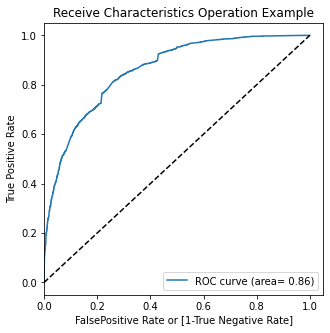

In [ ]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

In [ ]:
# creating a different probability cutoff
numbers= [float(x)/10 for x in range(10)]
for i in numbers:
  y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.257922,0,1,1,1,0,0,0,0,0,0,0
1,1,0.994229,1,1,1,1,1,1,1,1,1,1,1
2,1,0.542888,1,1,1,1,1,1,1,0,0,0,0
3,0,0.130538,0,1,1,0,0,0,0,0,0,0,0
4,0,0.212157,0,1,1,1,0,0,0,0,0,0,0


In [ ]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
  cm1= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
  total1=sum(sum(cm1))
  accuracy=(cm1[0,0]+cm1[1,1])/total1
  speci= cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i]= [i,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.579215,0.984020,0.333333
0.2,0.2,0.694581,0.931876,0.550447
0.3,0.3,0.751152,0.843566,0.695019
0.4,0.4,0.769267,0.708579,0.806130
0.5,0.5,0.784364,0.630782,0.877650
0.6,0.6,0.773081,0.513036,0.931034
0.7,0.7,0.754807,0.433137,0.950192
0.8,0.8,0.730812,0.332212,0.972925
0.9,0.9,0.693787,0.204794,0.990805


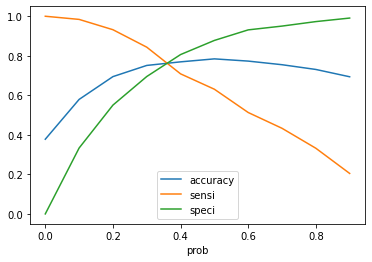

In [ ]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted']= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x> 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.257922,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.994229,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.542888,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.130538,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.212157,0,1,1,1,0,0,0,0,0,0,0,0


In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7651358652471

In [ ]:
confusion2= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[2875, 1040],
       [ 438, 1940]])

In [ ]:
TP= confusion2[1,1]

In [ ]:
TN= confusion2[0,0]

In [ ]:
FP= confusion2[0,1]

In [ ]:
FN= confusion2[1,0]

In [ ]:
#SENSITIVITY
TP/(TP+FN)

0.815811606391926

In [ ]:
#Specificity
TN/(TN+FP)

0.7343550446998723

Prediction on Test Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   What is your current occupation                8991 

In [ ]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,What is your current occupation_Working Professional,What is your current occupation_not provided,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened
3308,1.0,0.117647,7.1250,0,0,0,0,0,0,0,0,0,0,1,0,1
4421,1.0,0.000000,0.0000,1,0,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,77.8125,0,0,0,1,0,0,0,0,0,0,0,0,0
5302,1.0,0.000000,0.0000,1,0,0,0,0,0,1,0,0,0,1,0,0
2169,1.0,0.588235,55.4375,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,31.0000,0,0,0,1,0,0,0,0,0,0,0,0,0
7836,1.0,0.588235,32.2500,0,0,0,0,0,0,0,0,0,1,0,1,0
8378,1.0,0.588235,25.5000,0,0,1,0,0,0,0,1,0,0,0,0,0
1263,1.0,0.117647,53.4375,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test) 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1) 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,1.000000
1,1,0.561265
2,1,1.000000
3,0,0.033064
4,0,1.000000


In [ ]:
y_pred_final.head()

,Converted,Conversation_Prob
0,0,1.000000
1,1,0.561265
2,1,1.000000
3,0,0.033064
4,0,1.000000


In [ ]:
y_pred_final['final_Predicted']=y_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.35 else 0)

In [ ]:
y_pred_final

,Converted,Conversion_Prob,final_Predicted
0,0,1.000000,1
1,1,0.561265,1
2,1,1.000000,1
3,0,0.033064,0
4,0,1.000000,1
...,...,...,...
2693,1,1.000000,1
2694,1,1.000000,1
2695,0,1.000000,1
2696,1,1.000000,1


In [ ]:
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.final_Predicted)

0.47071905114899926

In [ ]:
confusion3= metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final.final_Predicted)
confusion3

array([[ 312, 1365],
       [  63,  958]])

In [ ]:
TP= confusion3[1,1]

In [ ]:
TN= confusion3[0,0]

In [ ]:
FP= confusion3[0,1]

In [ ]:
FN= confusion3[1,0]

In [ ]:
#SENSITIVITY
TP/(TP+FN)

0.9382957884427032

In [ ]:
#Specificity
TN/(TN+FP)

0.18604651162790697

Precision-Recall

In [ ]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)

In [ ]:
confusion

array([[3436,  479],
       [ 878, 1500]])

In [ ]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

In [ ]:
#Precision
TP/(TP+FP)

0.7579585649317837

In [ ]:
#Recall
TP/(TP+FN)

0.6307821698906644

WITH THE CUTOFF 0.35 Precision is 75% and Recall is 63%

Precision and Recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve


In [ ]:
y_train_pred_final.Converted,y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64, 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [ ]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

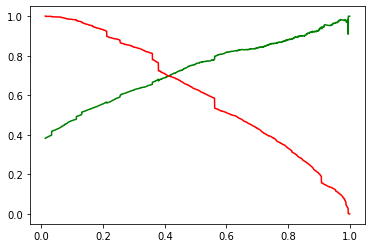

In [ ]:
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.show()

In [ ]:
y_train_pred_final['final_predicted']= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.257922,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.994229,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.542888,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.130538,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.212157,0,1,1,1,0,0,0,0,0,0,0,0


In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7692674400127125

In [ ]:
confusion4=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion4

array([[3436,  479],
       [ 878, 1500]])

In [ ]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

In [ ]:
#Precision
TP/(TP+FP)

0.7579585649317837

In [ ]:
#Recall
TP/(TP+FN)

0.6307821698906644

WITH THE CUTOFF 0.40 , Accuracy is 77% Precision is 75% and Recall is 63%

Prediction on Test set

In [ ]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test) 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1) 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,1.000000
1,1,0.561265
2,1,1.000000
3,0,0.033064
4,0,1.000000


In [ ]:
y_pred_final['final_predicted']= y_pred_final.Conversion_Prob.map(lambda x:1 if x >0.4 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,1.000000,1
1,1,0.561265,1
2,1,1.000000,1
3,0,0.033064,0
4,0,1.000000,1
...,...,...,...
2693,1,1.000000,1
2694,1,1.000000,1
2695,0,1.000000,1
2696,1,1.000000,1


In [ ]:
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.final_predicted)

0.4651593773165308

In [ ]:
confusion5=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion5

array([[3436,  479],
       [ 878, 1500]])

In [ ]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

In [ ]:
#Precision
TP/(TP+FP)

0.7579585649317837

In [ ]:
#Recall
TP/(TP+FN)

0.6307821698906644